Numero totale immagini caricate: 61578
Shape labels: (61578, 18)


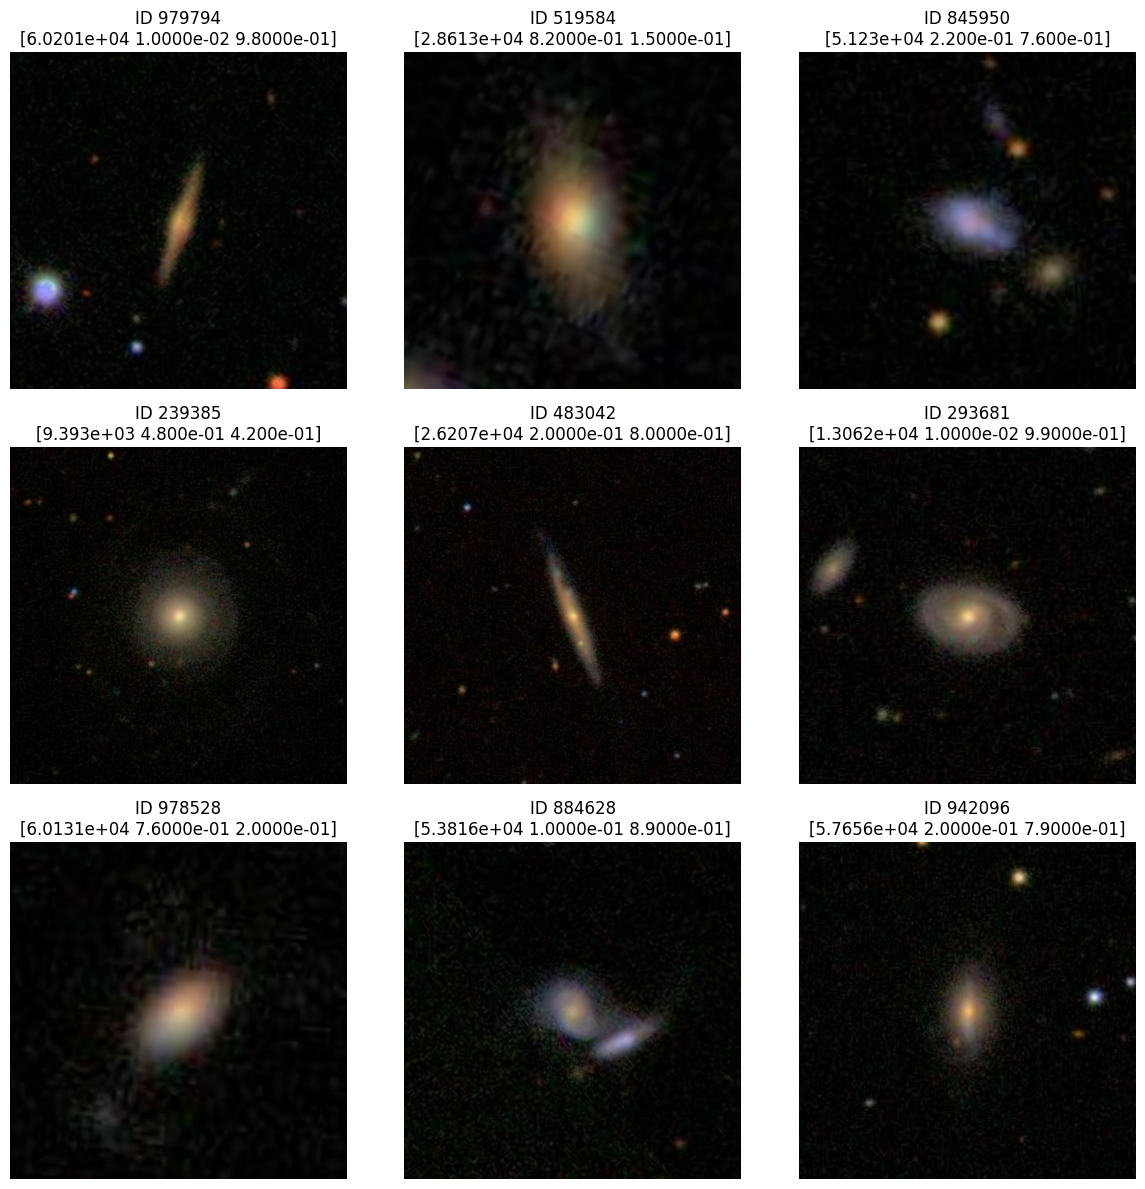

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np

from utils import trim_file_list, img_label

# Step 1: Caricamento dati
# Percorso immagini (modifica se serve)
img_dir = "../data/images/images_training_rev1"
image_paths = glob.glob(f'{img_dir}/*')
labels_df = pd.read_csv("../data/labels.csv").set_index('GalaxyID')

# Pulizia: teniamo solo immagini che hanno label


print(f"Numero totale immagini caricate: {len(image_paths)}")
print(f"Shape labels: {labels_df.shape}")


image_paths = trim_file_list(image_paths, labels_df)

# Step 2: Visualizzazione di 9 immagini random
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
sample_paths = random.sample(image_paths, 9)


for ax, img_path in zip(axes.flatten(), sample_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    
    # Prendo l'id e qualche label come esempio
    img_id = int(img_path.split('/')[-1].split('.')[0])
    label_values = labels_df.loc[img_id].values[:3]  # Prendo ad esempio solo le prime 3 classi
    ax.set_title(f'ID {img_id}\n{label_values.round(2)}')

plt.tight_layout()
plt.show()


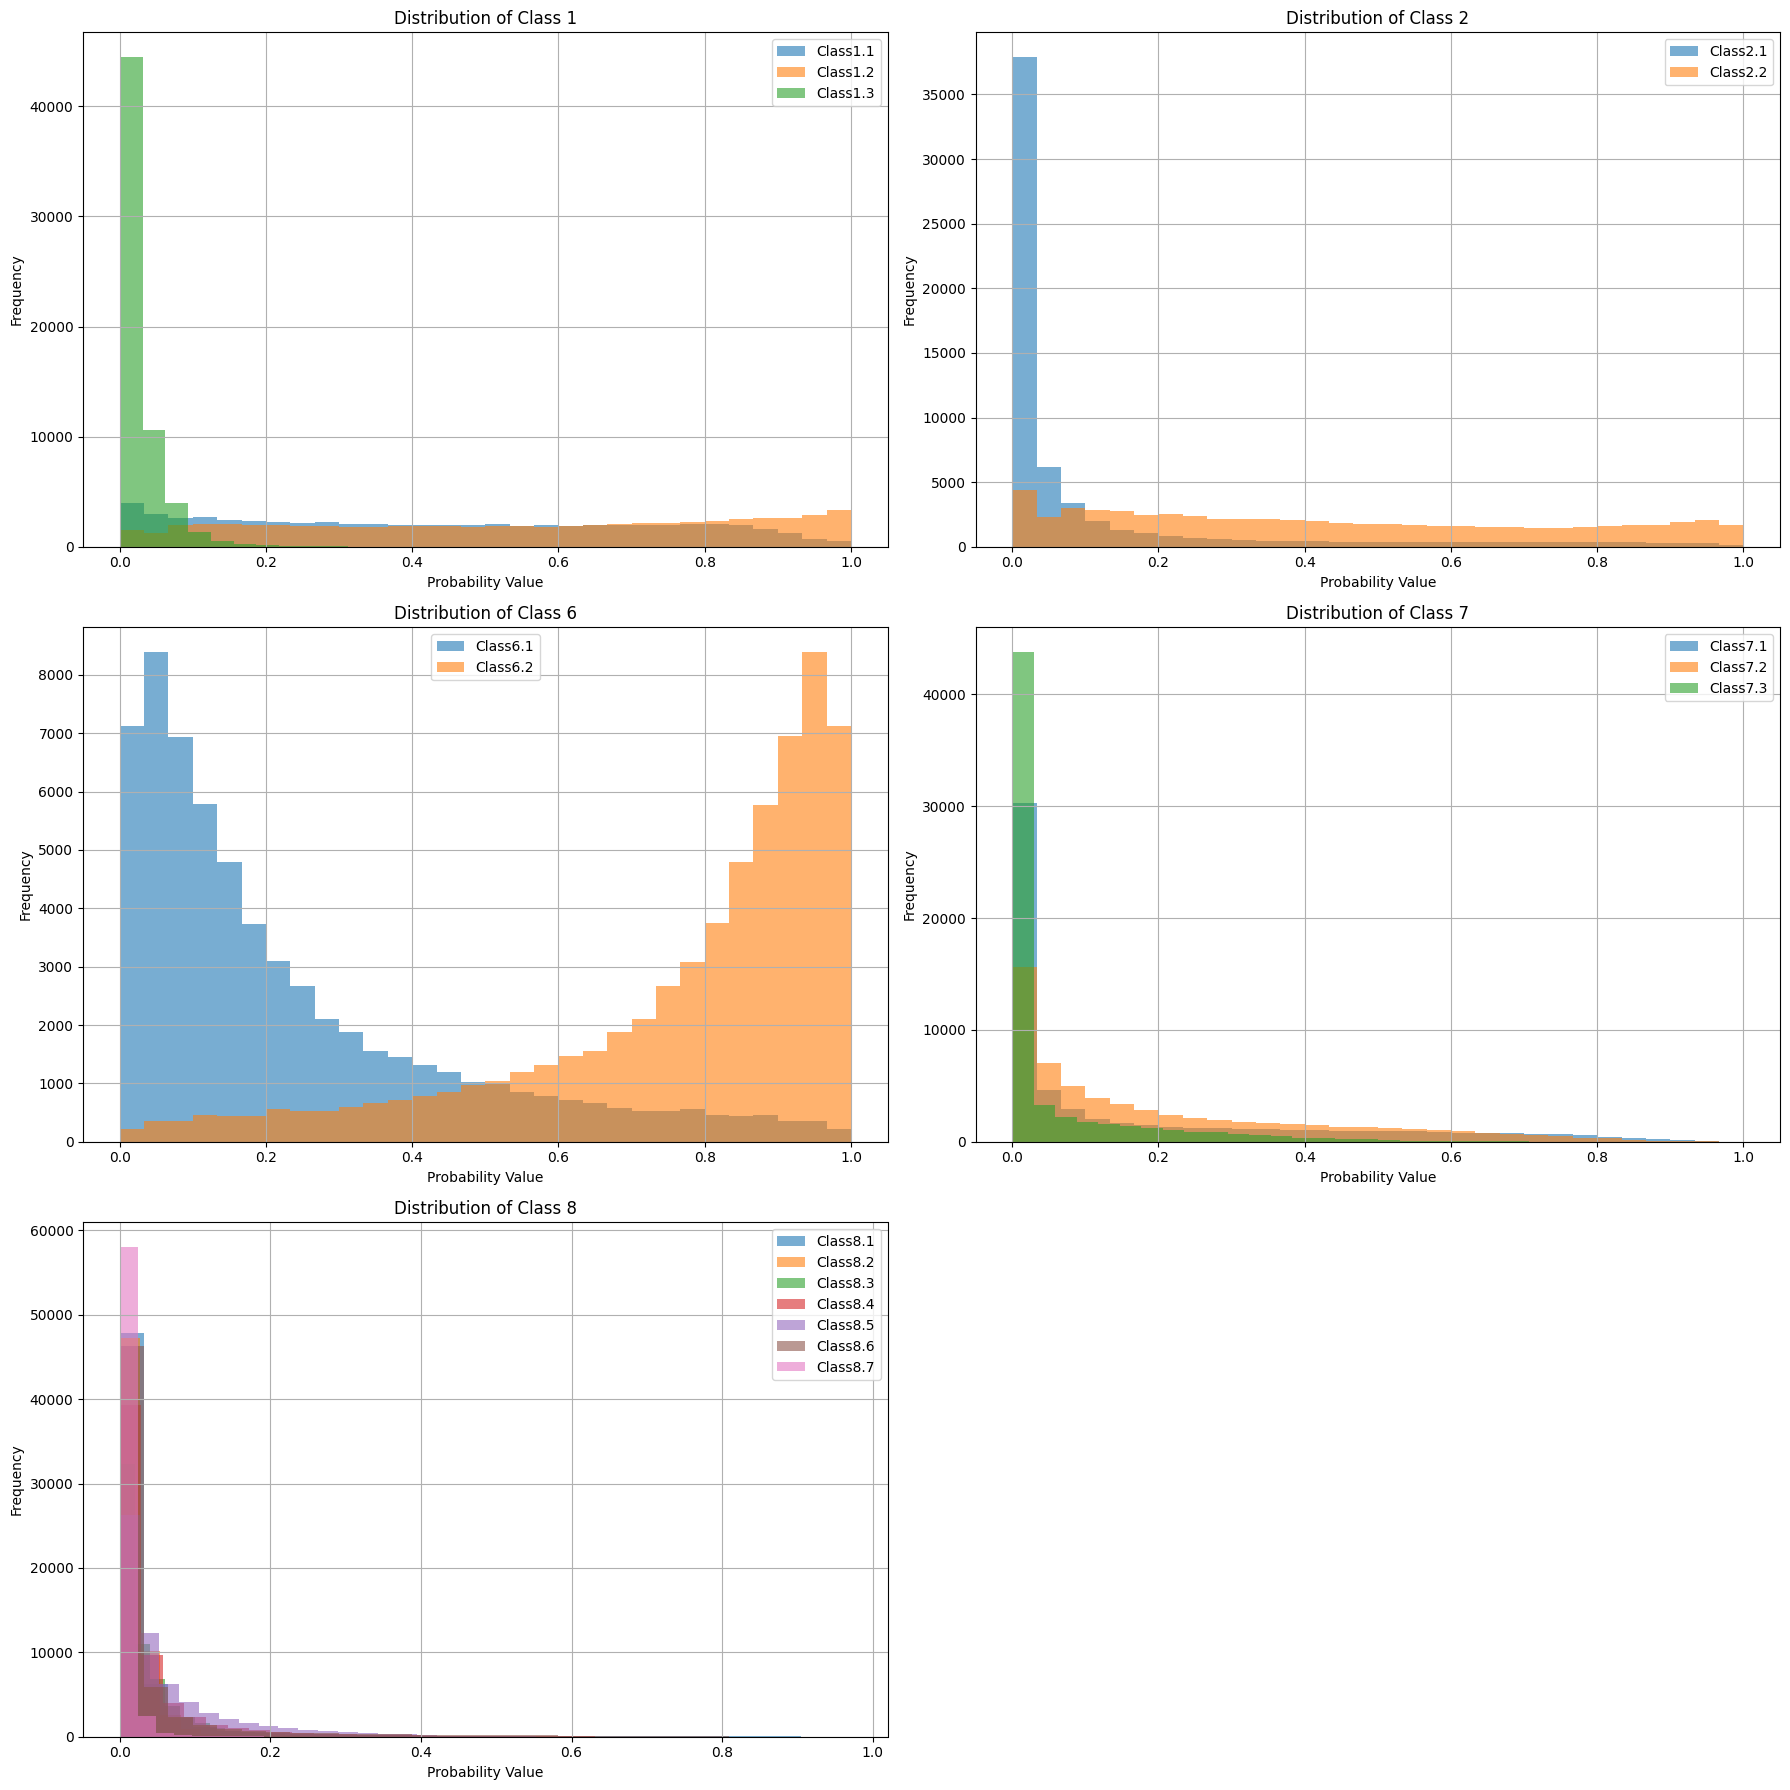

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


preprocessing=StandardScaler()
# Step 1: Load the labels
labels_df = pd.read_csv("..//data/labels.csv")

# Step 2: Drop useless column if present
if 'Unnamed: 0' in labels_df.columns:
    labels_df = labels_df.drop(columns=['Unnamed: 0'])

# Step 3: Set GalaxyID as index
labels_df = labels_df.set_index('GalaxyID')


# Step 4: Define groups of classes
class_groups = {
    'Class 1': ['Class1.1', 'Class1.2', 'Class1.3'],
    'Class 2': ['Class2.1', 'Class2.2'],
    'Class 6': ['Class6.1', 'Class6.2'],
    'Class 7': ['Class7.1', 'Class7.2', 'Class7.3'],
    'Class 8': ['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7']
}

class_groups_log = {
    'Class 1': ['Class1.1', 'Class1.2', 'Class1.3'],
    'Class 7': ['Class7.1', 'Class7.2', 'Class7.3'],
    'Class 8': ['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7']
}

 # evitare zero esatto

class_group_smooth={
    'Class 2': ['Class2.1', 'Class2.2'],
    'Class 6': ['Class6.1', 'Class6.2'],
}


# Step 5: Create one big figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))  # 3 rows, 2 columns
axes = axes.flatten()

# Step 6: Plot each group
for idx, (class_name, columns) in enumerate(class_groups.items()):
    ax = axes[idx]
    for col in columns:
        ax.hist(labels_df[col], bins=30, alpha=0.6, label=col)
    ax.set_title(f'Distribution of {class_name}')
    ax.set_xlabel('Probability Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

# Step 7: Turn off the unused subplot (we have 6 subplots but only 5 groups)
axes[-1].axis('off')

plt.tight_layout()
plt.show()


Come notiamo gli istrogrammi sono decisamente sbilanciati. 

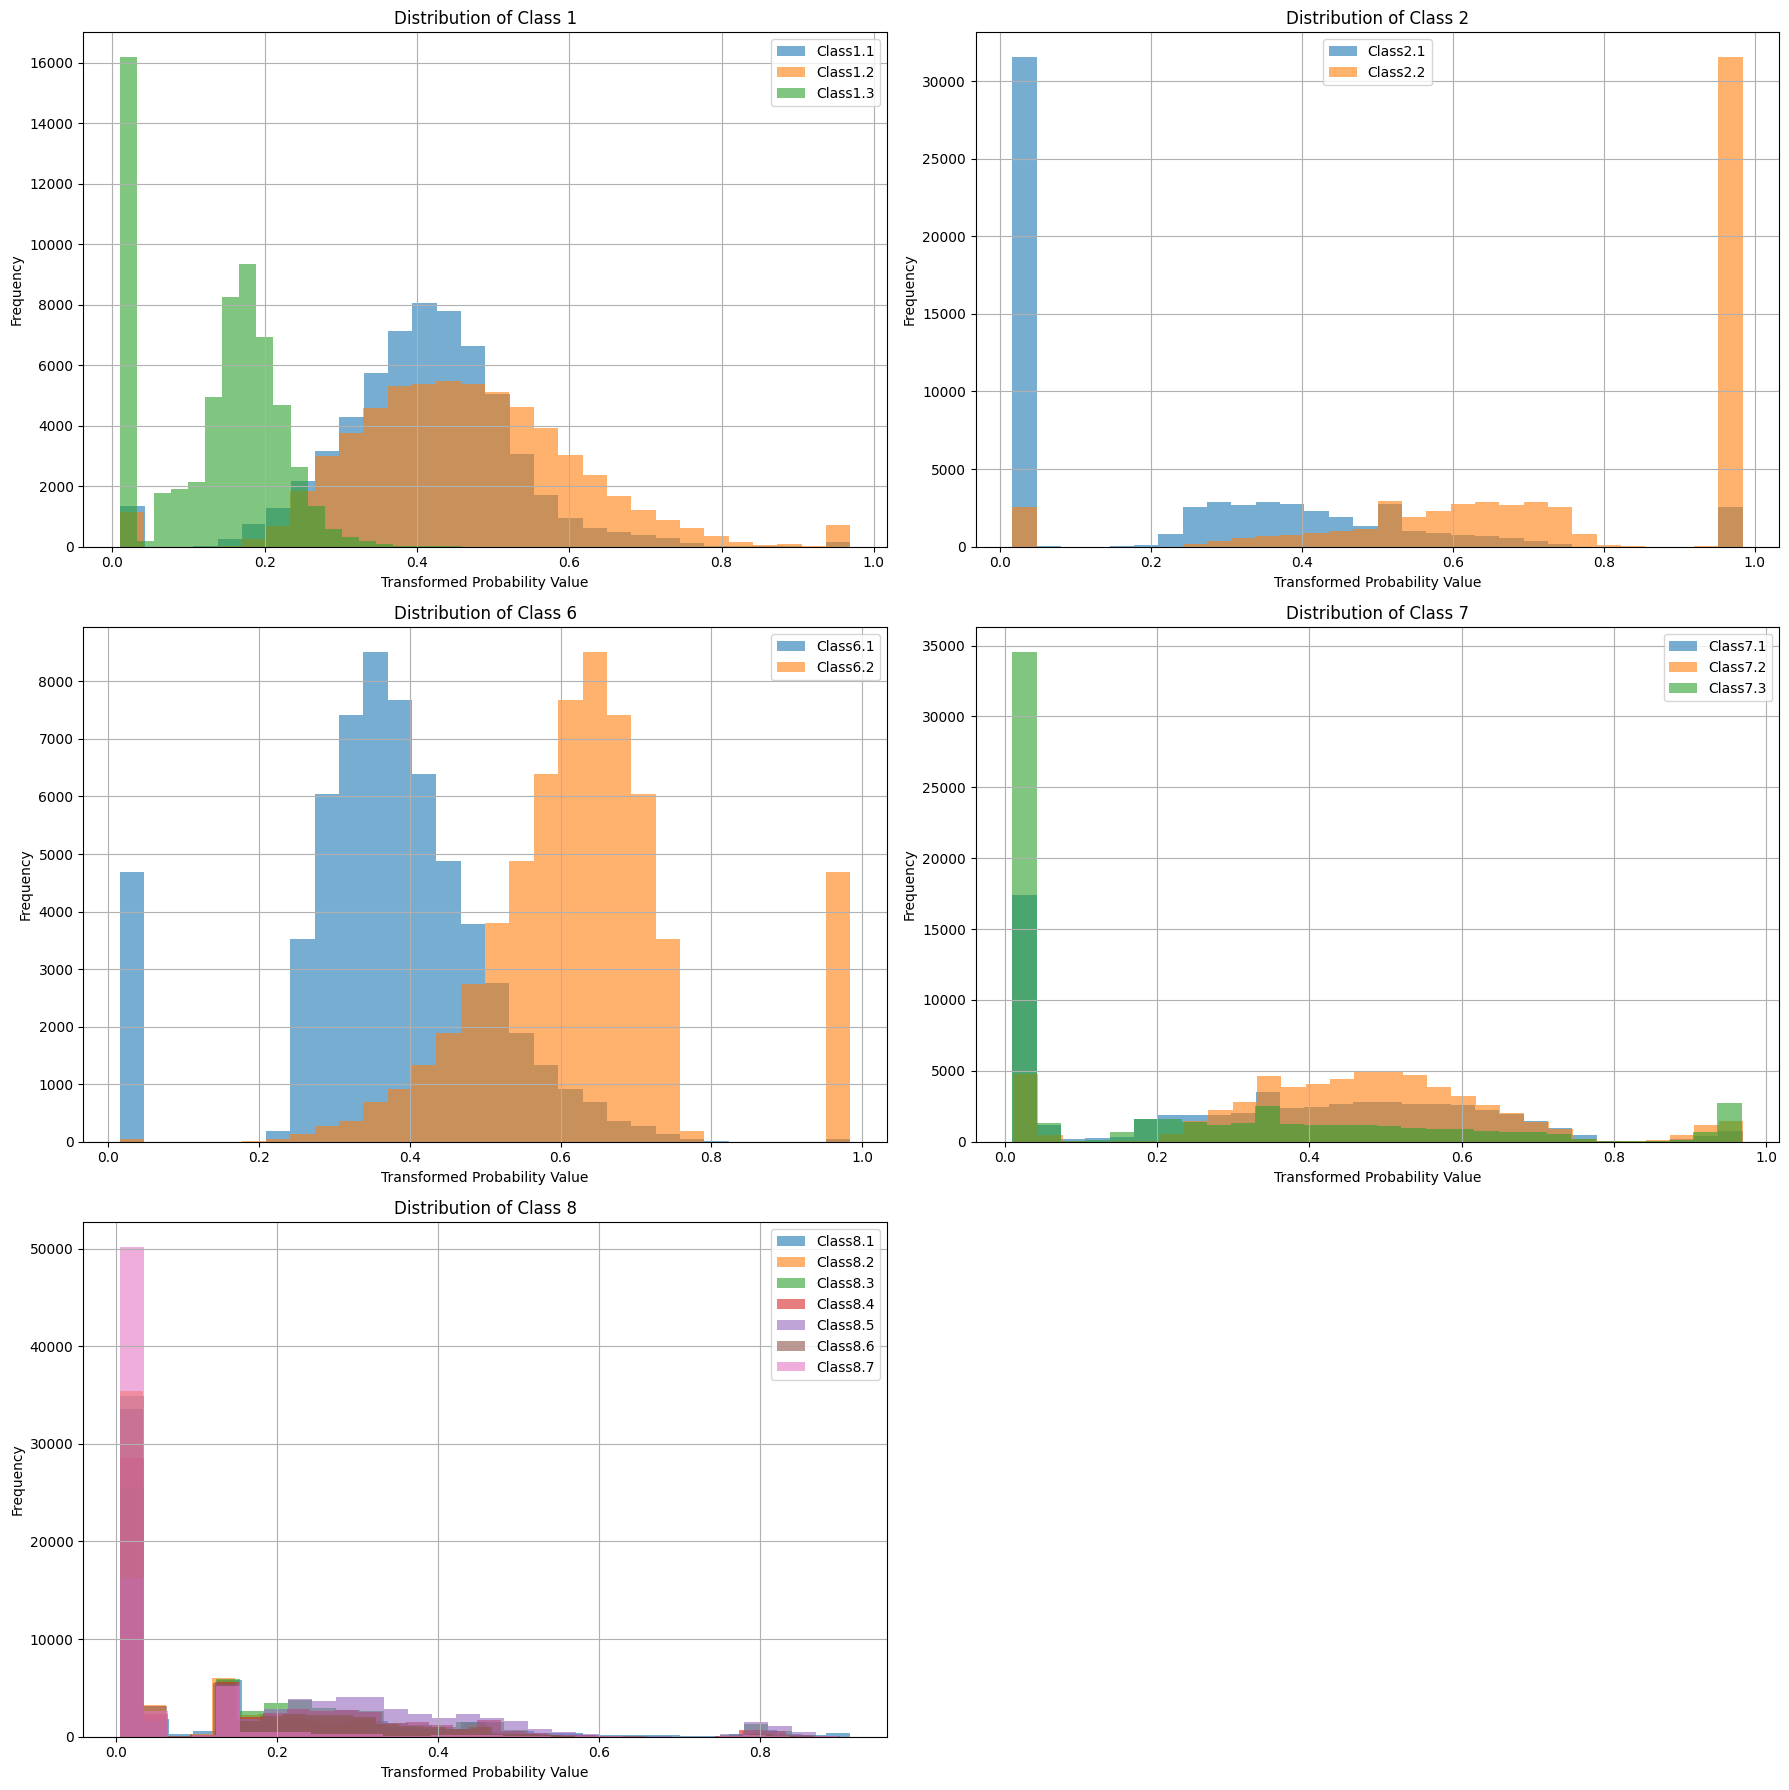

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Step 1: Load the labels
labels_df = pd.read_csv("..//data/labels.csv")
if 'Unnamed: 0' in labels_df.columns:
    labels_df = labels_df.drop(columns=['Unnamed: 0'])
labels_df = labels_df.set_index('GalaxyID')

# Step 2: Define groups of classes
class_groups = {
    'Class 1': ['Class1.1', 'Class1.2', 'Class1.3'],
    'Class 2': ['Class2.1', 'Class2.2'],
    'Class 6': ['Class6.1', 'Class6.2'],
    'Class 7': ['Class7.1', 'Class7.2', 'Class7.3'],
    'Class 8': ['Class8.1', 'Class8.2', 'Class8.3',
                'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7']
}
dependency = {
    'Class 7': 'Class1.1',
    'Class 2': 'Class1.2',
}

EPS = 1e-6
gamma = 0.3  # power exponent (<1 stretches low values)

# 1) Apply power stretch + renormalisation to every group that must sum to 1
for group,cols in class_groups.items():
    # clip to avoid exact zeros
    arr = labels_df[cols].clip(lower=EPS)
    # power stretch: expand small values
    arr = arr ** gamma
    # renormalise so that the probabilities in each row sum to 1
    arr = arr.div(arr.sum(axis=1), axis=0)
    

    # write back into the DataFrame
    labels_df[cols] = arr
    
    


    


# Step 3: Plotting
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()
for idx, (class_name, columns) in enumerate(class_groups.items()):
    ax = axes[idx]
    for col in columns:
        ax.hist(labels_df[col], bins=30, alpha=0.6, label=col)
    ax.set_title(f'Distribution of {class_name}')
    ax.set_xlabel('Transformed Probability Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)
axes[-1].axis('off')
plt.tight_layout()
plt.show()


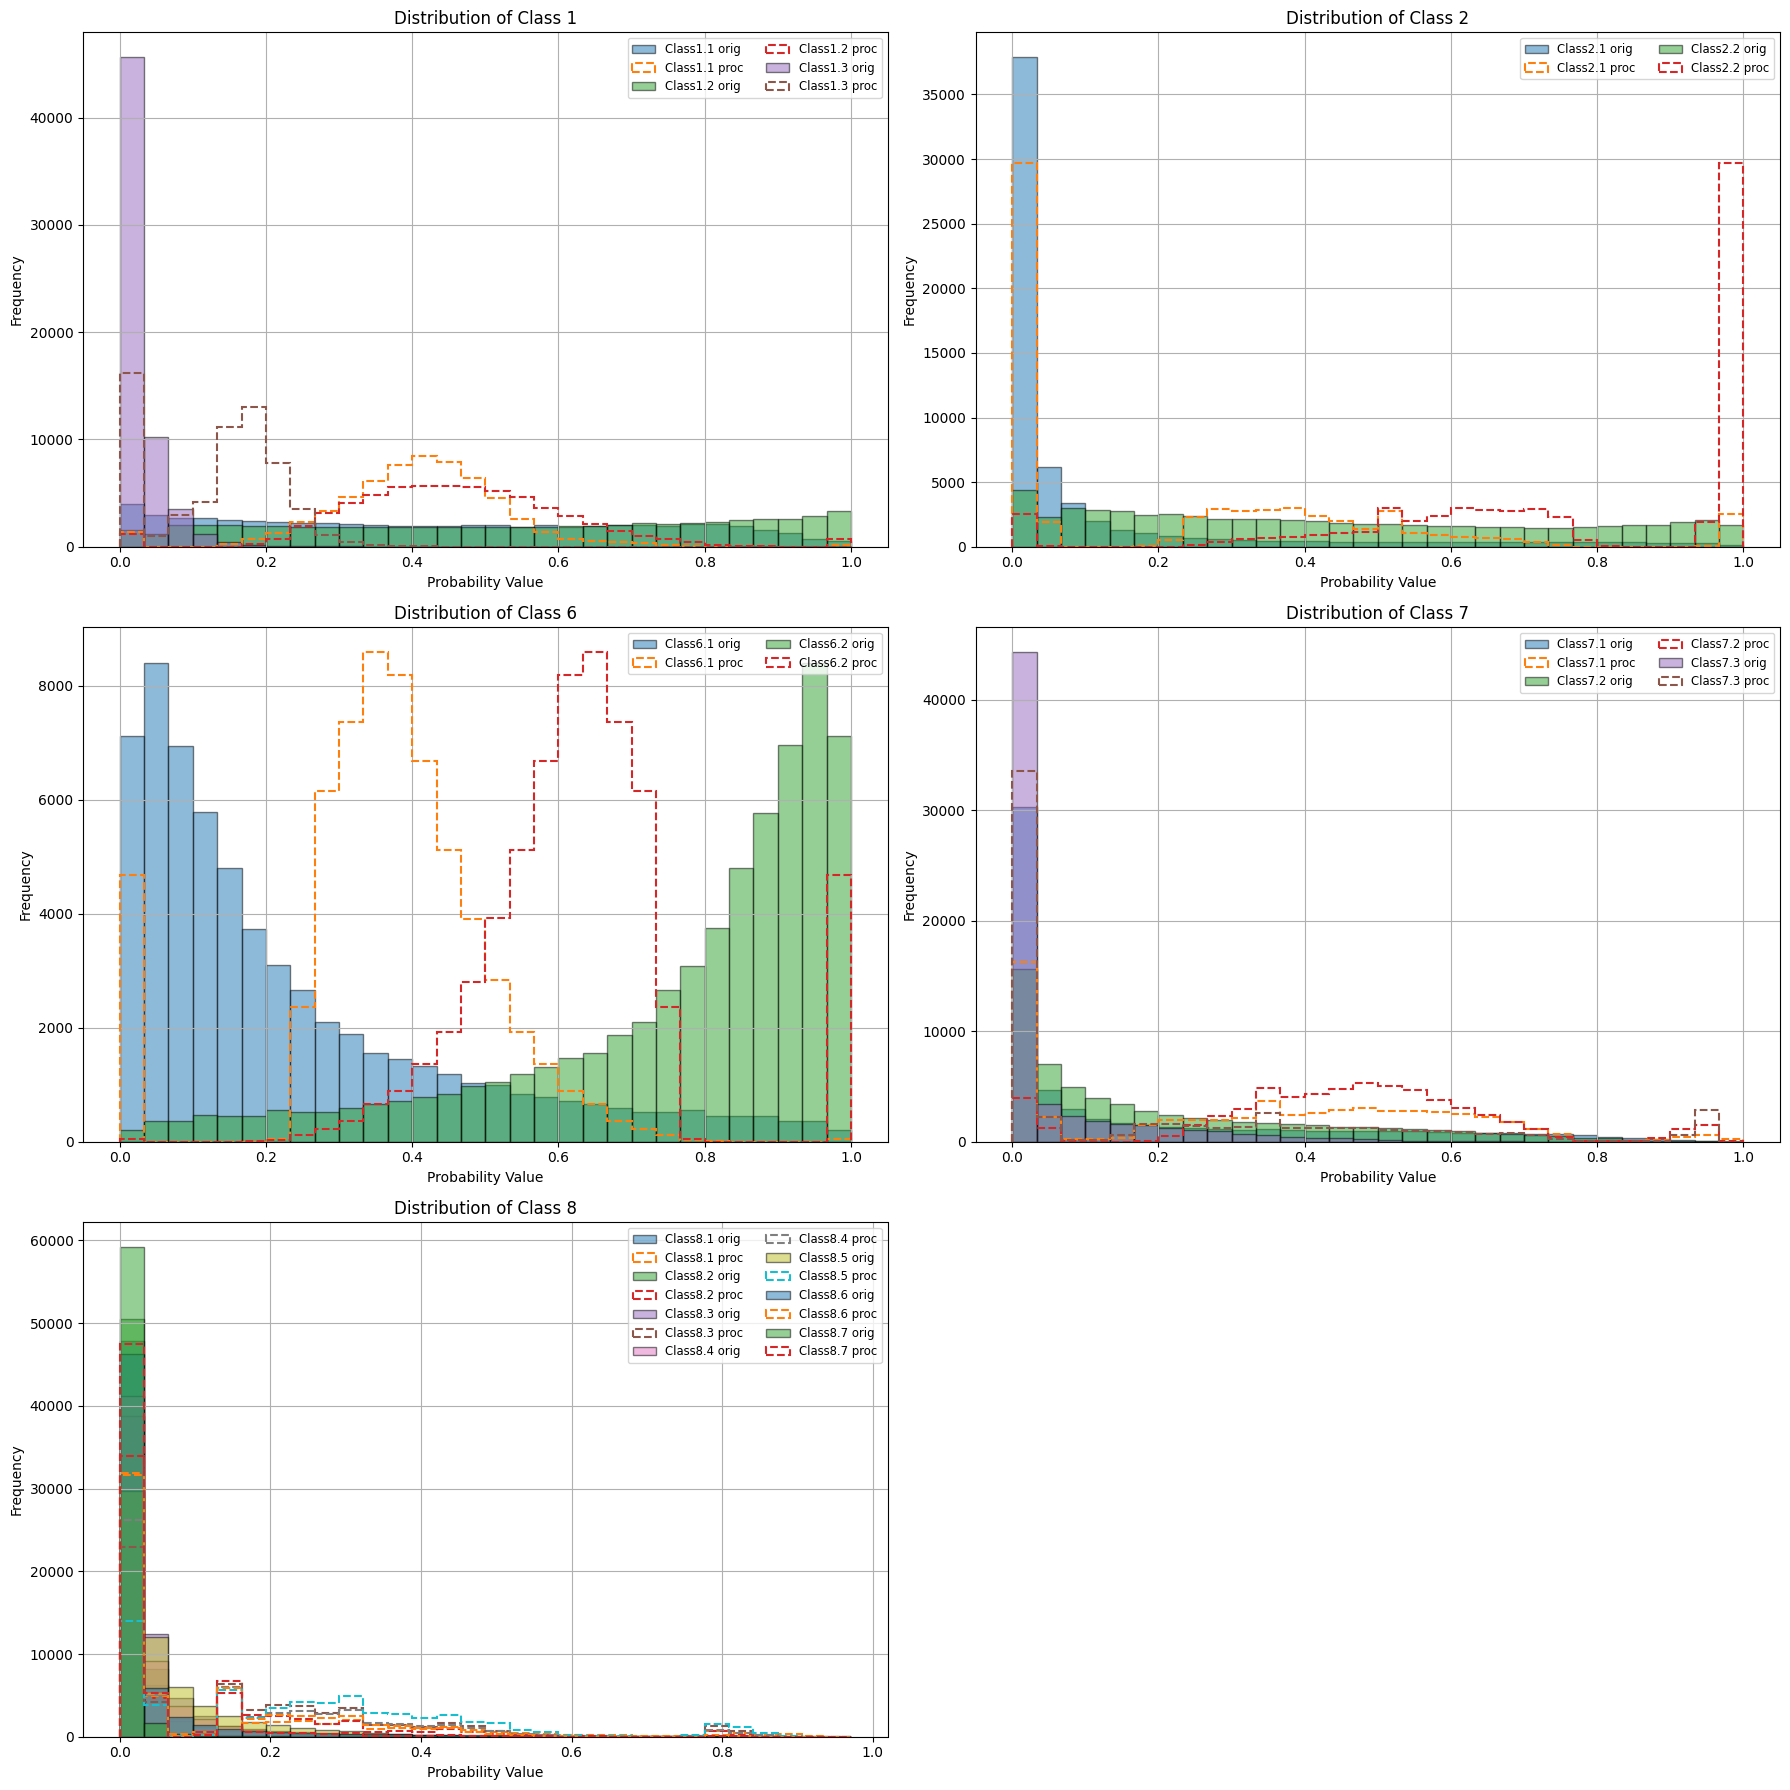

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load labels
labels_df = pd.read_csv("../data/labels.csv")
if 'Unnamed: 0' in labels_df.columns:
    labels_df = labels_df.drop(columns=['Unnamed: 0'])
labels_df = labels_df.set_index('GalaxyID')

# Define groups of classes
class_groups = {
    'Class 1': ['Class1.1', 'Class1.2', 'Class1.3'],
    'Class 2': ['Class2.1', 'Class2.2'],
    'Class 6': ['Class6.1', 'Class6.2'],
    'Class 7': ['Class7.1', 'Class7.2', 'Class7.3'],
    'Class 8': ['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4',
                'Class8.5', 'Class8.6', 'Class8.7']
}

# Create a copy and apply power-stretch + renormalisation
EPS = 1e-6
gamma = 0.3
processed_df = labels_df.copy()

for cols in class_groups.values():
    # clip to avoid exact zeros, power-stretch, renormalise to sum = 1
    arr = processed_df[cols].clip(lower=EPS) ** gamma
    arr = arr.div(arr.sum(axis=1), axis=0)
    processed_df[cols] = arr

# Plotting: un unico grafico con subplot 3x2
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for idx, (group_name, cols) in enumerate(class_groups.items()):
    ax = axes[idx]
    # Calcolo dei bins comuni a tutte le distribuzioni del gruppo
    data_all = labels_df[cols].values.flatten()
    bins = np.linspace(data_all.min(), data_all.max(), 31)

    for col in cols:
        # Original (filled)
        ax.hist(labels_df[col], bins=bins, alpha=0.5,
                label=f"{col} orig", edgecolor='black')
        # Processed (dashed outline)
        ax.hist(processed_df[col], bins=bins, histtype='step',
                linestyle='--', linewidth=1.5,
                label=f"{col} proc")

    ax.set_title(f'Distribution of {group_name}')
    ax.set_xlabel('Probability Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize='small', ncol=2)
    ax.grid(True)

# Nasconde l'ultimo subplot vuoto
axes[-1].axis('off')

plt.tight_layout()
plt.show()


Number of galaxies selected: 24247


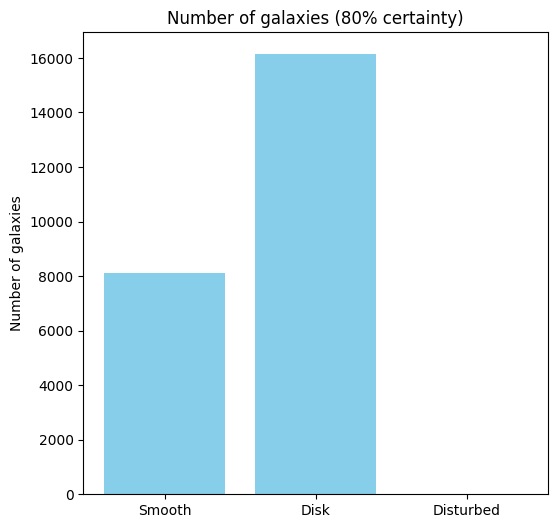

Smooth: 8110 galaxies
Disk: 16135 galaxies
Disturbed: 2 galaxies


In [16]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Step 1: Load the labels
labels_df = pd.read_csv("..//data/labels.csv")
if 'Unnamed: 0' in labels_df.columns:
    labels_df = labels_df.drop(columns=['Unnamed: 0'])
labels_df = labels_df.set_index('GalaxyID')


top_level_cols = ['Class1.1', 'Class1.2', 'Class1.3']
top_labels = labels_df[top_level_cols]

# Step 5: Filter rows where at least one class > 0.8
mask = (top_labels > 0.8).any(axis=1)
filtered_labels = top_labels[mask]

print(f"Number of galaxies selected: {filtered_labels.shape[0]}")

# Step 6: Find the dominant class (argmax)
dominant_class = filtered_labels.values.argmax(axis=1)

# Step 7: Count occurrences of each class
class_counts = np.bincount(dominant_class, minlength=3)

# Step 8: Plot
class_names = ['Smooth', 'Disk', 'Disturbed']

plt.figure(figsize=(6,6))
plt.bar(class_names, class_counts, color='skyblue')
plt.title('Number of galaxies (80% certainty)')
plt.ylabel('Number of galaxies')
plt.show()

# Optional: Print also the counts
for name, count in zip(class_names, class_counts):
    print(f"{name}: {count} galaxies")

vediamo che applicando hot encoding c'è un problema di sbilanciamento, la classe 3 non verrà mai predetta. aggiungeremo quindi un peso maggiore a questa classe.

Il dataset Galaxy Zoo è stato creato tramite crowdsourcing, coinvolgendo partecipanti non esperti nella classificazione delle immagini di galassie.
Questo processo, sebbene abbia permesso di raccogliere un enorme numero di annotazioni, introduce diversi potenziali problemi:

Rumore nelle etichette: la mancanza di competenza astronomica dei partecipanti può portare a errori di classificazione.

Bias soggettivo: la percezione delle caratteristiche delle galassie può variare molto da persona a persona.

Immagini ambigue o di bassa qualità: alcune immagini potrebbero essere sfocate, rovinate o poco chiare, rendendo difficile una classificazione affidabile.

Distribuzione sbilanciata delle classi: alcune categorie di risposte (ad esempio le galassie "disturbate") sono molto più rare di altre, rendendo il dataset fortemente sbilanciato.

Questi problemi devono essere tenuti in considerazione durante l'analisi e la costruzione dei modelli di machine learning, per evitare di trarre conclusioni fuorvianti o di addestrare modelli che generalizzano male.

Data la natura crowdsourced del dataset Galaxy Zoo, è ragionevole aspettarsi la presenza di rumore nelle etichette, dovuto a errori umani, bias soggettivi e difficoltà nell'interpretazione di alcune immagini.

Per ridurre l'impatto di questo rumore sul processo di training dei modelli, è possibile adottare alcune strategie:

Selezione dei campioni più affidabili: limitare il dataset ai soli esempi in cui almeno l'80% dei partecipanti concorda sulla classificazione, riducendo così l'incertezza nelle etichette.

Ponderazione dei campioni: assegnare un peso maggiore ai campioni con alti livelli di consenso tra i votanti, e un peso minore a quelli più incerti, durante la fase di ottimizzazione del modello.

Esclusione di immagini problematiche: rimuovere o trattare separatamente immagini di bassa qualità, rovinate o difficilmente classificabili.

Data augmentation per classi rare: aumentare il numero di esempi per le categorie meno rappresentate applicando trasformazioni sulle immagini, come rotazioni, zoom o riflessioni.

Utilizzo di tecniche robuste al rumore: applicare metodi come il label smoothing o l'early stopping, che aiutano il modello a non sovra-adattarsi a etichette potenzialmente sbagliate.

Adottare queste strategie permette di migliorare la qualità del training e di ottenere modelli più affidabili e generalizzabili.